In [35]:
# Backward Euler Method
using LinearAlgebra
function backeuler(a, b, u0, N)
    u=zeros(N+1)
    dt=(b-a)/N
    t=Vector(range(a, b, N+1))
    #Solving for du/dt= -u+sin(10t)
    u[1]=u0
    for i in 1:N
        u[i+1]=(u[i].+ dt*sin(10*t[i+1]))/(1 + dt)
    end
    return t, u
end

backeuler (generic function with 2 methods)

In [30]:
function ParaReal(F, G, Tf, u0, N, K)
    dt=Tf/N
    TT=0:dt:Tf
    U=[Vector{Float64}(undef, N+1) for k in 1:K+1]
    Fn=zeros(N+1)
    Go=zeros(N+1)
    Gn=zeros(N+1)
    U[1][1]=u0
    for n in 1:N
        Go[n+1]=G(TT[n], TT[n+1], U[1][n])
        U[1][n+1]=Go[n+1]
    end
    for k in 1:K
        for n in 1:N
            Fn[n+1]=F(TT[n], TT[n+1], U[k][n])
        end
        U[k+1][1]=u0
        for n in 1:N
            Gn[n+1]=G(TT[n], TT[n+1], U[K+1][n])
            U[k+1][n+1]=Fn[n+1]+Gn[n+1]-Go[n+1]
        end
        Go=Gn
    end
    return TT, U, Fn
end

ParaReal (generic function with 1 method)

In [20]:
function Fs(T0, Tf, u0) 
    t, u=backeuler(T0, Tf, u0, nF)
    return u[end]
end

Fs (generic function with 1 method)

In [21]:
function Gs(T0, Tf, u0) 
    t, u=backeuler(T0, Tf, u0, nG)
    return u[end]
end

Gs (generic function with 1 method)

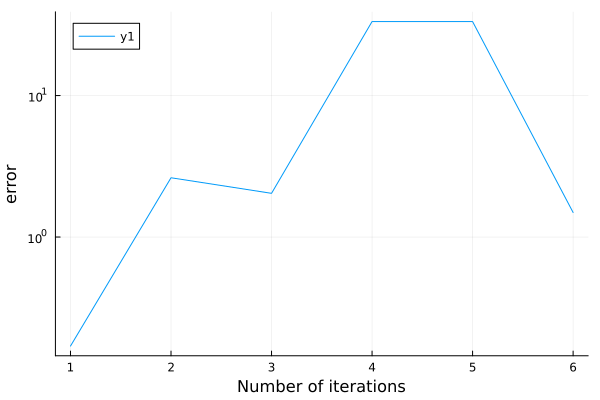

In [46]:
T0=0
Tf=10
u0=1
nF=100
nG=2
N=100
K=5
err=zeros(K+1)
tval, ux=backeuler(T0, Tf, u0, N)
for k in 1:K+1
    TT, U, Fn=ParaReal(Fs, Gs, Tf, u0, N, k)
    err[k]=norm(U[k] - ux)
    #println(U)
end
using Plots
plot(err, yaxis=:log, xlabel="Number of iterations", ylabel="error")

In [44]:
err

101-element Vector{Float64}:
  0.16972484656651332
  2.0639341730634952
  1.9310562462885332
 18.681165227591904
 20.110903222542536
  2.5155811259829126
  1.6591747599837654
 23.766471334954215
 24.419692447337344
  1.0687729882206527
  1.0288991116476076
 25.384882752746122
 25.39207545245039
  ⋮
  0.3392784726506827
  0.3392524536783521
  0.3394557914134249
  0.33925900157528277
  0.33931406853149576
  0.33927876203496055
  0.3392863664088365
  0.33927547542261455
  0.3393655352902835
  0.3392576790868134
  0.3392660868015171
  0.3392793904120298

In [50]:
function cauchy_point(g::Function, B::Matrix, delta::Float64)
    p = -g / norm(g)
    if norm(B * p) <= delta
        return p
    end
    tau = delta / norm(p' * B * p)
    return min(tau, 1) * p
end

cauchy_point (generic function with 1 method)

In [51]:
# Define the objective function and its gradient
f(x) = x[1]^2 + 2x[2]^2 - 2x[1]*x[2] - 4x[1]
g(x) = [2x[1] - 2x[2] - 4, 4x[2] - 2x[1]]

# Define the Hessian approximation
B = [2 -2; -2 4]

# Define the trust region radius
delta = 1.0

# Compute the Cauchy point
p = cauchy_point(g, B, delta)

# Print the result
println("Cauchy Point: ", p)

LoadError: MethodError: no method matching -(::typeof(g))
[0mClosest candidates are:
[0m  -(::Any, [91m::ChainRulesCore.AbstractThunk[39m) at ~/.julia/packages/ChainRulesCore/a4mIA/src/tangent_types/thunks.jl:35
[0m  -(::Any, [91m::ChainRulesCore.ZeroTangent[39m) at ~/.julia/packages/ChainRulesCore/a4mIA/src/tangent_arithmetic.jl:102
[0m  -(::Any, [91m::ChainRulesCore.NoTangent[39m) at ~/.julia/packages/ChainRulesCore/a4mIA/src/tangent_arithmetic.jl:62
[0m  ...